# Import all kind of stuff

In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E
from theory.models.bcs import f_of_E
from theory.models.bcs import get_I_nA

from theory.models.tg import get_I_pat_nA as get_I_nA_tg

from theory.models.constants import k_B_meV, G_0_muS

loaded constants...


# Set plot fontsizes

In [2]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [3]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# gap-suppression

In [4]:
def Delta_of_T(T: NDArray[np.float64], T_C: float = 1.0, Delta_0: float = 1.0):
    Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)
    return Delta


T = np.linspace(0, 1, 101)

Delta = Delta_of_T(T)

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_39623/816220097.py:2: RuntimeWarning: divide by zero encountered in divide
  Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)


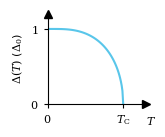

In [5]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.5, 1.2),
)
# Plot the simplified gap curve
ax.plot(T, Delta, color=colors(0))
color = "k"  # colors(2)

ax.set_xlim(0, 1.3)
ax.set_ylim(0, 1.2)

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# Move axis labels near arrow tips
# ax.text(x_lim[1], -0.2, "$T$", ha="left", va="center", fontsize=8)
ax.text(
    x_lim[1] - (x_lim[0] - x_lim[1]) / 10,
    (y_lim[0] - y_lim[1]) / 8,
    "$T$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$\\Delta(T)$ ($\\Delta_0$)")
# ax.set_xlabel("$T/T_\\mathrm{C}$")
ax.set_yticks([0, 1], labels=["$0$", "$1$"])
ax.set_xticks([0, 1], labels=["$0$", "$T_\\mathrm{C}$"])


fig.tight_layout(pad=0.1)
fig.savefig("gap.pgf")
fig.savefig("gap.pdf")

# dos-fermi

In [6]:
Delta_meV = 0.180
E_meV = np.linspace(-2.5 * Delta_meV, 2.5 * Delta_meV, 1001)
Gammas_Delta = np.array([0, 1, 2.5, 5]) * 1e-2

Ns = np.full((Gammas_Delta.shape[0], E_meV.shape[0]), np.nan)
for i, Gamma in enumerate(Gammas_Delta):
    Ns[i, :] = N_of_E(
        E_meV=E_meV,
        Delta_meV=Delta_meV,
        Gamma_meV=Gamma * Delta_meV,
    )

Gammas_temp, _ = np.meshgrid(Gammas_Delta, Gammas_Delta)
Gamma_map = cmap(clim=[0.1, 0.8], inverse=True)

/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/bcs.py:53: RuntimeWarning: divide by zero encountered in divide
  dos = np.divide(E_complex_meV, denom)
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/bcs.py:53: RuntimeWarning: invalid value encountered in divide
  dos = np.divide(E_complex_meV, denom)


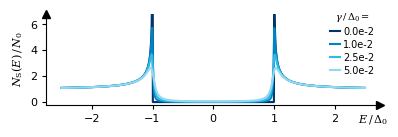

In [7]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

for i, Gamma in enumerate(Gammas_Delta):
    ax.plot(
        E_meV / Delta_meV,
        Ns[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(Gammas_Delta)),
        zorder=i,
        label=f"{Gamma*1e2}e-2",
    )

ax.set_ylim(-0.2, 6.8)
ax.set_yticks([0, 2, 4, 6])
ax.set_xticks([-2, -1, 0, 1, 2])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 40,
    (y_lim[0] - y_lim[1]) / 8,
    "$E\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$N_\\mathrm{S}(E)\\,/\\,N_0$")

ax.legend(
    title="$\\gamma\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    bbox_to_anchor=(1.0, 1.1),
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.3,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
)

fig.tight_layout(pad=0.1)
fig.savefig("dos.pgf")
fig.savefig("dos.pdf")

In [8]:
Delta_meV = 0.180
E_meV = np.linspace(-1.5 * Delta_meV, 1.5 * Delta_meV, 1501)
Ts_TC = np.array([0, 0.1, 0.3, 0.5, 0.8])
T_C = Delta_meV / (1.764 * k_B_meV)

fs = np.full((Ts_TC.shape[0], E_meV.shape[0]), np.nan)
for i, T in enumerate(Ts_TC):
    fs[i, :] = f_of_E(E_meV=E_meV, T_K=T * T_C)

dfs = -np.gradient(fs, E_meV / Delta_meV, axis=1)
dfs[0, :] = np.zeros_like(E_meV)
dfs[0, 750] = 10

Ts_temp, _ = np.meshgrid(Ts_TC, Ts_TC)
T_map = cmap(clim=[0.1, 0.8], inverse=True)

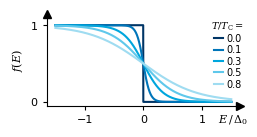

In [9]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(2.4, 1.2),
)

for i, T in enumerate(Ts_TC):
    ax.plot(
        E_meV / Delta_meV,
        fs[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(Ts_TC)),
        zorder=i,
        label=f"{T:1.1f}",
    )

ax.set_ylim(-0.05, 1.15)
ax.set_yticks([0, 1])
ax.set_xticks([-1, 0, 1])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 25,
    (y_lim[0] - y_lim[1]) / 8,
    "$E\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$f(E)$")

ax.legend(
    title=r"$T/T_\mathrm{C} = $",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    bbox_to_anchor=(1.05, 1.0),
    # bbox_to_anchor=(1.0, 1.15),
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.15,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
)

fig.tight_layout(pad=0.1)
fig.savefig("fermi.pgf")
fig.savefig("fermi.pdf")

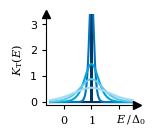

In [23]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.4, 1.2),
)

for i, T in enumerate(Ts_TC):
    ax.plot(
        E_meV / Delta_meV,
        dfs[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(Ts_TC)),
        zorder=i - 10,
        label=f"{T:1.1f}",
        lw=1.5,
    )

ax.set_ylim(-0.1, 3.4)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([-1, 0, 1], labels=["$0$", "$1$", " "])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 10,
    (y_lim[0] - y_lim[1]) / 8,
    "$E\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$K_\\mathrm{T}(E)$")


# ax.legend(
#     title=r"$T/T_\mathrm{C} = $",
#     handlelength=1.0,
#     loc="upper right",
#     frameon=False,
#     fontsize=7,
#     title_fontsize=7,
#     bbox_to_anchor=(1.25, 1.15),
#     borderpad=0.1,  # reduces padding inside the legend box
#     labelspacing=0.3,  # reduces vertical spacing between items
#     handletextpad=0.3,  # reduces spacing between line and label
# )

fig.tight_layout(pad=0.1)
fig.savefig("fermi-kernel.pgf")
fig.savefig("fermi-kernel.pdf")

0.0 1.31570500244332 0.0002
0.4 1.31570500244332 0.00019444133336630397
0.5 1.31570500244332 0.00018804532807854552
0.8 1.31570500244332 0.00014027482618766247
0.9 1.31570500244332 0.0001045330859371641
0.95 1.31570500244332 7.585000223505532e-05


/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_39623/816220097.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)


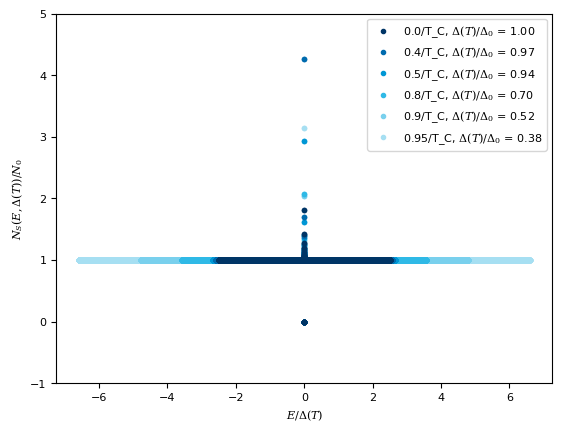

In [11]:
# DOS does not smear with T!
Delta = 0.2
E = np.linspace(-2.5 * Delta, 2.5 * Delta, 25001)
Ts = np.array([0, 0.4, 0.5, 0.8, 0.9, 0.95])

Ns = np.full((Ts.shape[0], E.shape[0]), np.nan)
for i, T in enumerate(Ts):
    T_C = Delta / 1.764 / k_B_meV
    Delta_T = Delta_of_T(
        T=T * Delta / 1.764 / k_B_meV, T_C=Delta / 1.764 / k_B_meV, Delta_0=Delta * 1e-3
    )
    if Delta_T == 1.0:
        Delta_T = Delta * 1e-3
    print(T, T_C, Delta_T)
    Ns[i, :] = N_of_E(E, Delta_meV=Delta_T, Gamma_meV=0)
    plt.plot(
        E * 1e-3 / Delta_T,
        Ns[i, :],
        ".",
        color=cmap(clim=(0.1, 0.8))(i / len(Ts)),
        zorder=len(Ts) - i,
        label=f"{T}/T_C, $\\Delta(T)/\\Delta_0$ = {Delta_T/Delta*1e3:.2f}",
    )

plt.xlabel("$E/\\Delta(T)$")
plt.ylabel("$N_S(E, \\Delta(T))/N_0$")
plt.ylim(-1, 5)
plt.legend()

# tunnel-current

Attention: don't use $G_0$ yet. its not introduced. stick to $G_N$

(0.0, 2.0)

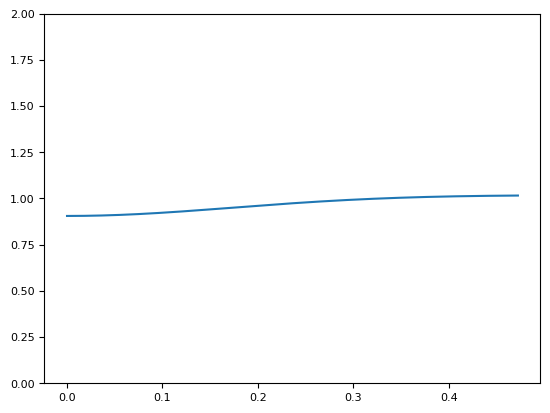

In [12]:
# parameter
T_K = 1
Delta_meV = 0.189
Gamma_meV = 0.2
tau = 1
V_mV = np.linspace(0, 2.5 * Delta_meV, 601)  # mV
I_NS_nA = get_I_nA(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(0.0, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)
plt.plot(V_mV, np.gradient(I_NS_nA, V_mV) / G_0_muS)
plt.ylim([0, 2])

In [13]:
# generate data
Delta_meV = 0.189
V_mV = np.linspace(0, 2.5 * Delta_meV, 601)  # mV
tau = 1
T_TC_NS = np.array([0, 0.1, 0.2, 0.4])
# T_TC_SS = np.array([0, 0.1, 0.2, 0.4])
T_TC_SS = np.array([0, 0.4, 0.5, 0.6])
T_C_K = 1.2
Gamma_Delta = np.array([0, 1, 2.5, 5.0]) * 1e-2
Gamma_Delta = np.array([0, 2.5, 5, 7.5]) * 1e-2

I_NN = tau * G_0_muS * V_mV  # nA
dIdV_NN = np.gradient(I_NN, V_mV) / G_0_muS

I_NS_T = np.full((T_TC_NS.shape[0], V_mV.shape[0]), np.nan)
I_SS_T = np.full((T_TC_SS.shape[0], V_mV.shape[0]), np.nan)
I_NS_Gamma = np.full((Gamma_Delta.shape[0], V_mV.shape[0]), np.nan)
I_SS_Gamma = np.full((Gamma_Delta.shape[0], V_mV.shape[0]), np.nan)

for i, T in enumerate(T_TC_NS):
    I_NS_T[i, :] = get_I_nA(
        V_mV=V_mV,
        tau=tau,
        Delta_meV=(0.0, Delta_meV),
        T_K=T * T_C_K,
        Gamma_meV=0.0,
    )
for i, T in enumerate(T_TC_SS):
    I_SS_T[i, :] = get_I_nA(
        V_mV=V_mV,
        tau=tau,
        Delta_meV=(Delta_meV, Delta_meV),
        T_K=T * T_C_K,
        Gamma_meV=0.0,
    )

for i, Gamma in enumerate(Gamma_Delta):
    I_NS_Gamma[i, :] = get_I_nA(
        V_mV=V_mV,
        tau=tau,
        Delta_meV=(0.0, Delta_meV),
        T_K=0.0,
        Gamma_meV=Gamma * Delta_meV,
    )
    I_SS_Gamma[i, :] = get_I_nA(
        V_mV=V_mV,
        tau=tau,
        Delta_meV=(Delta_meV, Delta_meV),
        T_K=0.0,
        Gamma_meV=Gamma * Delta_meV,
    )

dIdV_NS_T = np.gradient(I_NS_T, V_mV, axis=1) / G_0_muS
dIdV_SS_T = np.gradient(I_SS_T, V_mV, axis=1) / G_0_muS
dIdV_NS_Gamma = np.gradient(I_NS_Gamma, V_mV, axis=1) / G_0_muS
dIdV_SS_Gamma = np.gradient(I_SS_Gamma, V_mV, axis=1) / G_0_muS

I_NS_T /= Delta_meV * G_0_muS
I_SS_T /= Delta_meV * G_0_muS
I_NS_Gamma /= Delta_meV * G_0_muS
I_SS_Gamma /= Delta_meV * G_0_muS

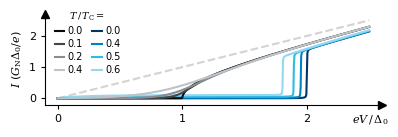

In [14]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

ax.plot(
    V_mV / Delta_meV,
    V_mV / Delta_meV,
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, T in enumerate(T_TC_NS):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        I_NS_T[i, :],
        color=cmap(clim=(0.1, 0.8), color="grau")(i / len(T_TC_NS)),
        zorder=i + 10,
        label=f"{T:1.1f}",
    )

for i, T in enumerate(T_TC_SS):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_SS_T[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(T_TC_SS)),
        zorder=i,
        label=f"{T:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$I$ ($G_\\mathrm{N}\\Delta_0 /e$)")

ax.legend(
    title="$T\\,/\\,T_\\mathrm{C} = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1.0,
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.3,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
    bbox_to_anchor=(0.01, 1.1),
)

fig.tight_layout(pad=0.1)
fig.savefig("tunnel-iv-T.pgf")
fig.savefig("tunnel-iv-T.pdf")

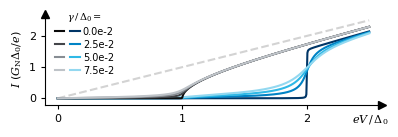

In [15]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

ax.plot(
    V_mV / Delta_meV,
    V_mV / Delta_meV,
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, Gamma in enumerate(Gamma_Delta):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        I_NS_Gamma[i, :],
        color=cmap(clim=(0.1, 0.8), color="grau")(i / len(Gamma_Delta)),
        zorder=i + 10,
        label="$\\,$",
    )

for i, Gamma in enumerate(Gamma_Delta):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_SS_Gamma[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(Gamma_Delta)),
        zorder=i,
        label=f"{Gamma*1e2:.1f}e-2",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$I$ ($G_\\mathrm{N}\\Delta_0 /e$)")

ax.legend(
    title="$\\gamma\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=0.1,
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.3,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
    bbox_to_anchor=(0.01, 1.1),
)

fig.tight_layout(pad=0.1)
fig.savefig("tunnel-iv-gamma.pgf")
fig.savefig("tunnel-iv-gamma.pdf")

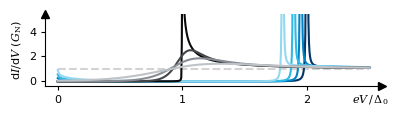

In [16]:
fig, ax = plt.subplots(figsize=(3.8, 1.0))

ax.plot(
    V_mV / Delta_meV,
    np.ones_like(V_mV / Delta_meV),
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, T in enumerate(T_TC_NS):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_NS_T[i, :],
        color=cmap(clim=(0.1, 0.8), color="grau")(i / len(T_TC_NS)),
        zorder=i + 100,
        label=f"{T:1.1f}",
    )

for i, T in enumerate(T_TC_SS):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_SS_T[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(T_TC_SS)),
        zorder=i + 10,
        label=f"{T:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("d$I/$d$V$ ($G_\\mathrm{N}$)")

fig.tight_layout(pad=0.1)
fig.savefig("tunnel-didv-T.pgf")
fig.savefig("tunnel-didv-T.pdf")

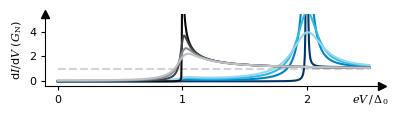

In [17]:
fig, ax = plt.subplots(figsize=(3.8, 1.0))

ax.plot(
    V_mV / Delta_meV,
    np.ones_like(V_mV / Delta_meV),
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, Gamma in enumerate(Gamma_Delta):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_NS_Gamma[i, :],
        color=cmap(clim=(0.1, 0.8), color="grau")(i / len(Gamma_Delta)),
        zorder=i + 10,
        label="$\\,$",
    )

for i, Gamma in enumerate(Gamma_Delta):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_SS_Gamma[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(Gamma_Delta)),
        zorder=i,
        label=f"{Gamma*1e2:.1f}e-2",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color=color,
    labelcolor=color,
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("d$I/$d$V$ ($G_\\mathrm{N}$)")

fig.tight_layout(pad=0.1)
fig.savefig("tunnel-didv-gamma.pgf")
fig.savefig("tunnel-didv-gamma.pdf")

# PAT

In [18]:
# generate data
Delta_meV = 0.180
V_mV = np.linspace(0, 2.5, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.1, 0.2]) * Delta_meV  # mV
tau = 1
T_K = 0.0
Gamma_meV = 0.0
nu_GHz = 5.0

N_S = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)
I_NS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)
I_SS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)

N_S_0 = N_of_E(E_meV=V_mV, Delta_meV=Delta_meV, Gamma_meV=Gamma_meV)

I_NS_0 = get_I_nA(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(0.0, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)
I_SS_0 = get_I_nA(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)

N_S = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=N_S_0, nu_GHz=nu_GHz)
I_NS = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_NS_0, nu_GHz=nu_GHz)
I_SS = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_SS_0, nu_GHz=nu_GHz)

dIdV_NS = np.gradient(I_NS, V_mV, axis=1) / G_0_muS
dIdV_SS = np.gradient(I_SS, V_mV, axis=1) / G_0_muS

I_NS /= Delta_meV * G_0_muS
I_SS /= Delta_meV * G_0_muS

/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/bcs.py:53: RuntimeWarning: divide by zero encountered in divide
  dos = np.divide(E_complex_meV, denom)
/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/bcs.py:53: RuntimeWarning: invalid value encountered in divide
  dos = np.divide(E_complex_meV, denom)


In [19]:
np.mean(N_S)

np.float64(1.0555123930177148)

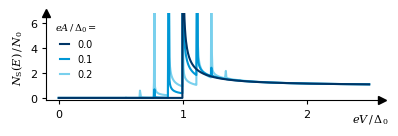

In [20]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

for i, A in enumerate(A_mV):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        N_S[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=10 - i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.2, 6.8)
ax.set_yticks([0, 2, 4, 6])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$N_\\mathrm{S}(E)\\,/\\,N_0$")

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
)

fig.tight_layout(pad=0.1)
# fig.savefig("pat-dos.pgf")
# fig.savefig("pat-dos.pdf")

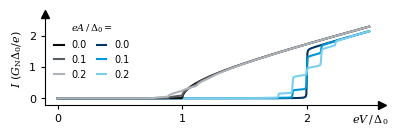

In [21]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

for i, A in enumerate(A_mV):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        I_NS[i, :],
        color=cmap(clim=(0.1, 0.8), color="grau")(i / len(A_mV)),
        zorder=i + 10,
        label=f"{A/Delta_meV:1.1f}",
    )

for i, A in enumerate(A_mV):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_SS[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$I$ ($G_\\mathrm{N}\\Delta_0 /e$)")

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1.0,
)

fig.tight_layout(pad=0.1)
fig.savefig("pat-iv.pgf")
fig.savefig("pat-iv.pdf")

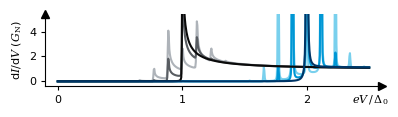

In [22]:
fig, ax = plt.subplots(figsize=(3.8, 1.0))

for i, A in enumerate(A_mV):
    ax.plot(
        V_mV / Delta_meV,
        dIdV_NS[i, :],
        color=cmap(clim=(0.1, 0.8), color="grau")(i / len(A_mV)),
        zorder=10 - i,
    )
    ax.plot(
        V_mV / Delta_meV,
        dIdV_SS[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=10 - i,
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("d$I/$d$V$ ($G_\\mathrm{N}$)")

fig.tight_layout(pad=0.1)
fig.savefig("pat-didv.pgf")
fig.savefig("pat-didv.pdf")